In [1]:
from os import path
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from enmspring.graphs import Stack
import networkx as nx
from networkx.drawing.nx_pylab import draw_networkx, draw_networkx_edge_labels
rootfolder = '/home/yizaochen/codes/dna_rna/fluctmatch_sequence'
enmroot = '/home/yizaochen/codes/dna_rna/enmspring'

### Part 1: Initialize

In [2]:
host = 'a_tract_21mer'
g_agent = Stack(host, rootfolder)
g_agent.build_node_list()
g_agent.initialize_three_mat()

node_list_by_id = g_agent.get_node_list_by_id()
mapping = {atomid: g_agent.atomname_map[g_agent.atomid_map_inverse[atomid]] for atomid in node_list_by_id}

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.


In [3]:
g_agent.df_st.head()

,PairID,PairType,Big_Category,Strand_i,Resid_i,Atomname_i,Atomid_i,Strand_j,Resid_j,Atomname_j,Atomid_j,k,b0
78,79,STACK-1,stack,STRAND1,1,N9,6,STRAND1,2,C8,28,0.2395,3.6840
79,80,STACK-1,stack,STRAND1,1,N9,6,STRAND1,2,N7,29,0.3350,3.5543
80,81,STACK-1,stack,STRAND1,1,N9,6,STRAND1,2,C5,30,0.2749,3.9279
94,95,STACK-1,stack,STRAND1,1,C8,7,STRAND1,2,C8,28,0.0916,3.9429
95,96,STACK-1,stack,STRAND1,1,C8,7,STRAND1,2,N7,29,0.1937,3.5251


### Part 2: Eigen-Decomposition

In [3]:
g_agent.build_adjacency_from_df_st()
g_agent.build_degree_from_adjacency()
g_agent.build_laplacian_by_adjacency_degree()
g_agent.eigen_decompose()

Finish the setup for Laplaican matrix.


### Part 3: Select Eigenvector

In [128]:
sele_id = 1
scale_factor = 1
eigv = g_agent.get_eigenvector_by_id(sele_id)
eigv_scale = np.abs(scale_factor * eigv)

norm = matplotlib.colors.Normalize(vmin=eigv_scale.min(), vmax=eigv_scale.max())
color_list = [norm(eigvec) for eigvec in eigv_scale]

print(f"|Min|: {eigv_scale.min():.4f}")
print(f"|Max|: {eigv_scale.max():.4f}")

|Min|: 0.0000
|Max|: 0.4375


### Part 4: Build A Graph Layout

In [119]:
radius = 2
dist_bw_base = 10
dist_bw_strand = 10
d_pos = g_agent.get_networkx_d_pos(radius, dist_bw_base, dist_bw_strand)
G = g_agent.get_networkx_graph(g_agent.df_st, key='k')

fig, ax = plt.subplots(figsize=(16,80))
draw_networkx(G, pos=d_pos, labels=mapping, cmap='Reds', node_color=color_list)
ax.set_ylim(-205, 5)

plt.savefig('Test.svg')
plt.clf()
#plt.show()

<Figure size 1152x5760 with 0 Axes>

### Part 5: Make filter

In [4]:
sele_name = 'C6'
sele_strandid = 'STRAND1'
filter_given = g_agent.get_filter_by_atomname_strandid(sele_name, sele_strandid)

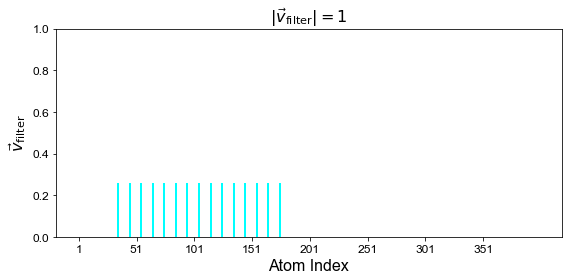

In [37]:
lw = 2
x = range(1, g_agent.n_node+1)
lbfz = 16
tkfz = 12

fig, ax = plt.subplots(figsize=(8,4))
ax.vlines(x, 0, filter_given, colors='cyan', lw=lw)
ax.set_ylim(0,1)
ax.set_xticks(x[::50])
ax.set_xlabel("Atom Index", fontsize=lbfz)
ax.set_ylabel(r"$\vec{v}_{\mathrm{filter}}$", fontsize=lbfz)
title = r'$|\vec{v}_{\mathrm{filter}}|=1$'
ax.set_title(title, fontsize=lbfz)
ax.tick_params(axis='both', labelsize=tkfz)
plt.tight_layout()
#plt.savefig('filter_example.svg')
plt.show()

In [159]:
sele_idx_list

[34, 44, 54, 64, 74, 84, 94, 104, 114, 124, 134, 144, 154, 164, 174]

In [27]:
idx_list_1 = [54, 64, 74, 84, 94, 104, 114, 124, 134, 144, 154]
example_1 = np.zeros(g_agent.n_node)
example_1[idx_list_1] = 1
example_1 = example_1 / np.linalg.norm(example_1)
print(np.linalg.norm(example_1))
print(np.dot(example_1, filter_given))

1.0
0.8563488385776752


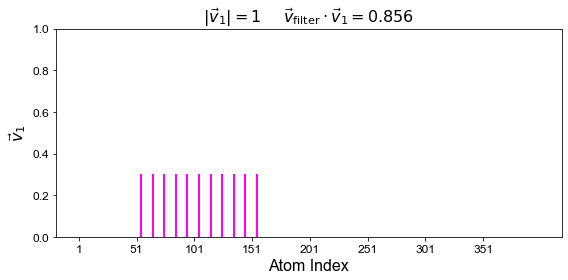

In [38]:
lw = 2
x = range(1, g_agent.n_node+1)
lbfz = 16
tkfz = 12

fig, ax = plt.subplots(figsize=(8,4))
ax.vlines(x, 0, example_1, colors='magenta', lw=lw)
ax.set_ylim(0,1)
ax.set_xticks(x[::50])
ax.set_xlabel("Atom Index", fontsize=lbfz)
ax.set_ylabel(r"$\vec{v}_1$", fontsize=lbfz)
title = r'$|\vec{v}_1|=1$     $\vec{v}_{\mathrm{filter}} \cdot \vec{v}_1 = 0.856$'
ax.set_title(title, fontsize=lbfz)
ax.tick_params(axis='both', labelsize=tkfz)
plt.tight_layout()
#plt.savefig('example1.svg')
plt.show()

In [39]:
idx_list_1 = [114, 124]
example_1 = np.zeros(g_agent.n_node)
example_1[idx_list_1] = 1
example_1 = example_1 / np.linalg.norm(example_1)
print(np.linalg.norm(example_1))
print(np.dot(example_1, filter_given))

0.9999999999999999
0.36514837167011066


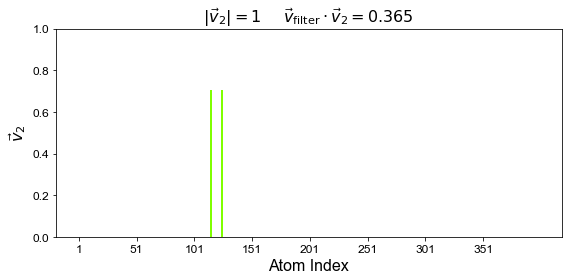

In [42]:
lw = 2
x = range(1, g_agent.n_node+1)
lbfz = 16
tkfz = 12

fig, ax = plt.subplots(figsize=(8,4))
ax.vlines(x, 0, example_1, colors='chartreuse', lw=lw)
ax.set_ylim(0,1)
ax.set_xticks(x[::50])
ax.set_xlabel("Atom Index", fontsize=lbfz)
ax.set_ylabel(r"$\vec{v}_2$", fontsize=lbfz)
title = r'$|\vec{v}_2|=1$     $\vec{v}_{\mathrm{filter}} \cdot \vec{v}_2 = 0.365$'
ax.set_title(title, fontsize=lbfz)
ax.tick_params(axis='both', labelsize=tkfz)
plt.tight_layout()
#plt.savefig('example2.svg')
plt.show()